In [132]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
import matplotlib.pyplot as plt
import json

warnings.filterwarnings("ignore", category=FutureWarning)

In [133]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.head()
df.dtypes

timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object

# Example User Stories & Correlations

In [134]:
print(df.dtypes)


timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object


In [135]:
# WORKS
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import json

# # --- Load your metadata ---
# with open("nested_users5.json", "r") as f:
#     nested_users = json.load(f)

# # Convert dictionary to a DataFrame
# author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# # --- Merge WhatsApp data with user info ---
# df_merged = df.merge(author_info_df, on='author', how='left')

# # --- Aggregate per apartment unit ---
# unit_stats = (
#     df_merged.groupby("Unit_nr")
#              .agg(total_messages=("message", "count"),
#                   avg_msg_length=("msg_length", "mean"),
#                   Entrance_nr=("Entrance_nr", "first"),
#                   Floor_nr=("Floor_nr", "first"),
#                   Nr_rooms=("Nr_rooms", "first"))
#              .reset_index()
# )

# # --- Plot the linear relationship ---
# plt.figure(figsize=(10, 6))
# sns.regplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     scatter_kws={"s": 80, "alpha": 0.7},
#     line_kws={"color": "red", "lw": 2},
# )

# plt.title("WhatsApp Activity per Unit: Total Messages vs. Average Message Length")
# plt.xlabel("Total Messages per Unit")
# plt.ylabel("Average Message Length per Unit")
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [136]:
# # WORKS
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import json

# # --- Load metadata ---
# with open("nested_users5.json", "r") as f:
#     nested_users = json.load(f)

# # Convert dictionary to a DataFrame
# author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# # --- Merge WhatsApp data with user info ---
# df_merged = df.merge(author_info_df, on='author', how='left')

# # --- Aggregate per apartment unit ---
# unit_stats = (
#     df_merged.groupby("Unit_nr")
#              .agg(total_messages=("message", "count"),
#                   avg_msg_length=("msg_length", "mean"),
#                   Entrance_nr=("Entrance_nr", "first"),
#                   Floor_nr=("Floor_nr", "first"),
#                   Nr_rooms=("Nr_rooms", "first"))
#              .reset_index()
# )

# # --- Linear relationship plot, colored by Entrance_nr ---
# sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Entrance_nr",           # Highlight by entrance
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},  # removed linewidth
#     line_kws={"lw": 2},
# )

# plt.title("WhatsApp Activity per Unit: Total Messages vs. Avg Message Length (by Entrance)")
# plt.xlabel("Total Messages per Unit")
# plt.ylabel("Average Message Length per Unit")
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [137]:
# # WORKS
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import json

# # --- Load metadata ---
# with open("nested_users5.json", "r") as f:
#     nested_users = json.load(f)

# # Convert dictionary to a DataFrame
# author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# # --- Merge WhatsApp data with user info ---
# df_merged = df.merge(author_info_df, on='author', how='left')

# # --- Aggregate per apartment unit ---
# unit_stats = (
#     df_merged.groupby("Unit_nr")
#              .agg(total_messages=("message", "count"),
#                   avg_msg_length=("msg_length", "mean"),
#                   Entrance_nr=("Entrance_nr", "first"),
#                   Floor_nr=("Floor_nr", "first"),
#                   Nr_rooms=("Nr_rooms", "first"))
#              .reset_index()
# )

# # --- Linear relationship plot, colored by Entrance_nr ---
# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Entrance_nr",           # Highlight by entrance
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
#     line_kws={"lw": 2},
# )

# # --- Customize labels ---
# g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
# g.fig.suptitle("WhatsApp Activity per Unit: Total Messages vs. Avg Message Length (by Portiek nr)", y=1.02)

# # --- Rename the legend title ---
# new_legend = g._legend
# new_legend.set_title("Portiek nr")

# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/MADS-DAV/.venv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


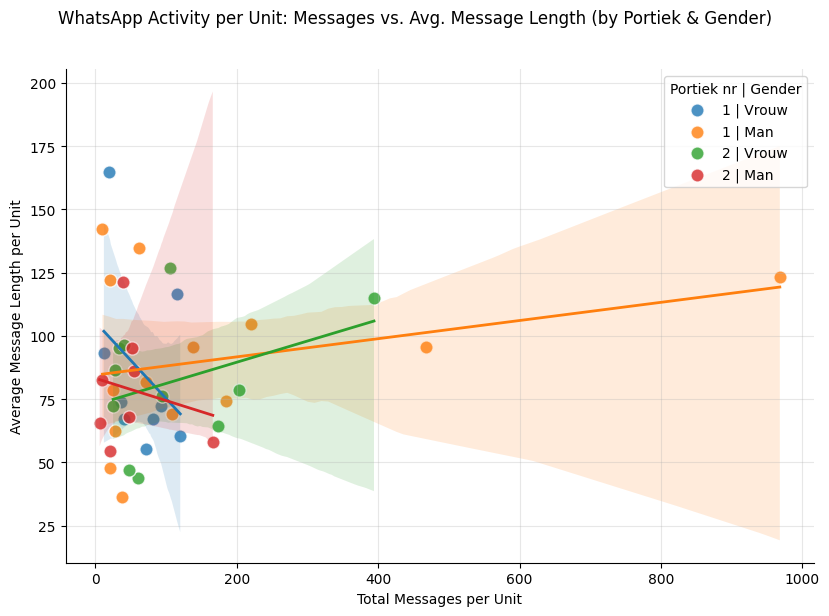

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# --- Load metadata ---
with open("nested_users5.json", "r") as f:
    nested_users = json.load(f)

# Convert dictionary to a DataFrame
author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# --- Merge WhatsApp data with user info ---
df_merged = df.merge(author_info_df, on='author', how='left')

# --- Aggregate per apartment unit ---
unit_stats = (
    df_merged.groupby("Unit_nr")
             .agg(total_messages=("message", "count"),
                  avg_msg_length=("msg_length", "mean"),
                  Entrance_nr=("Entrance_nr", "first"),
                  Gender=("Gender", "first"),
                  Floor_nr=("Floor_nr", "first"),
                  Nr_rooms=("Nr_rooms", "first"))
             .reset_index()
)

# --- Create combined hue column ---
unit_stats["Portiek_Gender"] = unit_stats["Entrance_nr"].astype(str) + " | " + unit_stats["Gender"]

# # --- Plot with combined hue ---
# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Portiek_Gender",
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
#     line_kws={"lw": 2},
# )

# # --- Customize labels ---
# g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
# g.fig.suptitle("WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Portiek & Gender)", y=1.02)

# # --- Rename legend title ---
# new_legend = g._legend
# new_legend.set_title("Portiek nr | Gender")

# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()
# --- Plot with combined hue ---
g = sns.lmplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Portiek_Gender",
    height=6,
    aspect=1.4,
    scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
    line_kws={"lw": 2},
    legend_out=False  # Keep legend inside the plot
)

# --- Customize labels ---
g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
g.fig.suptitle("WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Portiek & Gender)", y=1.02)

# --- Move legend to top-right ---
g.ax.legend(loc="upper right", title="Portiek nr | Gender")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/MADS-DAV/.venv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


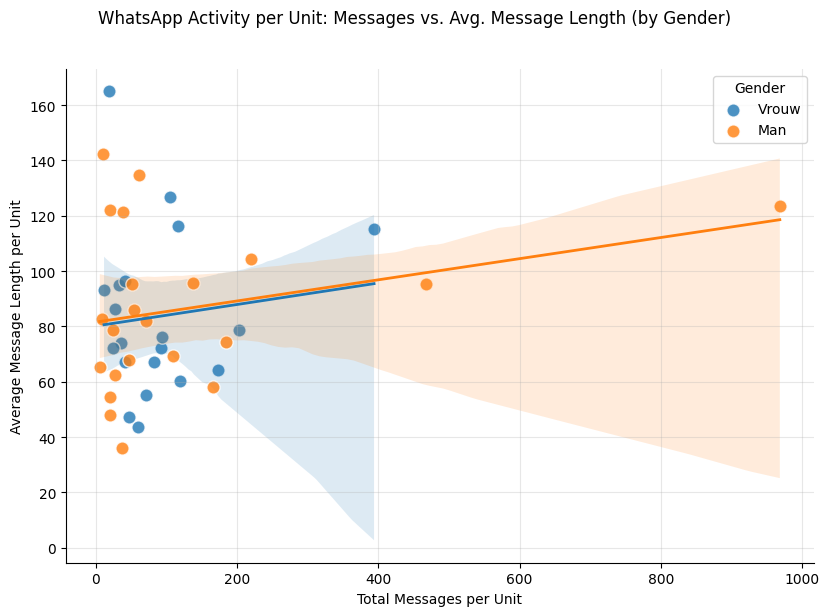

In [139]:
# --- Plot with only Gender as hue ---
g = sns.lmplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Gender",  # Only gender
    height=6,
    aspect=1.4,
    scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
    line_kws={"lw": 2},
    legend_out=False  # Keep legend inside the plot
)

# --- Customize labels ---
g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
g.fig.suptitle("WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Gender)", y=1.02)

# --- Move legend to top-right ---
g.ax.legend(loc="upper right", title="Gender")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [140]:
print(df_merged.columns)


Index(['timestamp', 'message', 'author', 'has_emoji', 'is_topk',
       'message_length', 'has_link', 'timestamp_category', 'hour',
       'day_of_week', 'msg_length', 'Name', 'Gender', 'Entrance_nr', 'Unit_nr',
       'Floor_nr', 'Nr_rooms'],
      dtype='object')


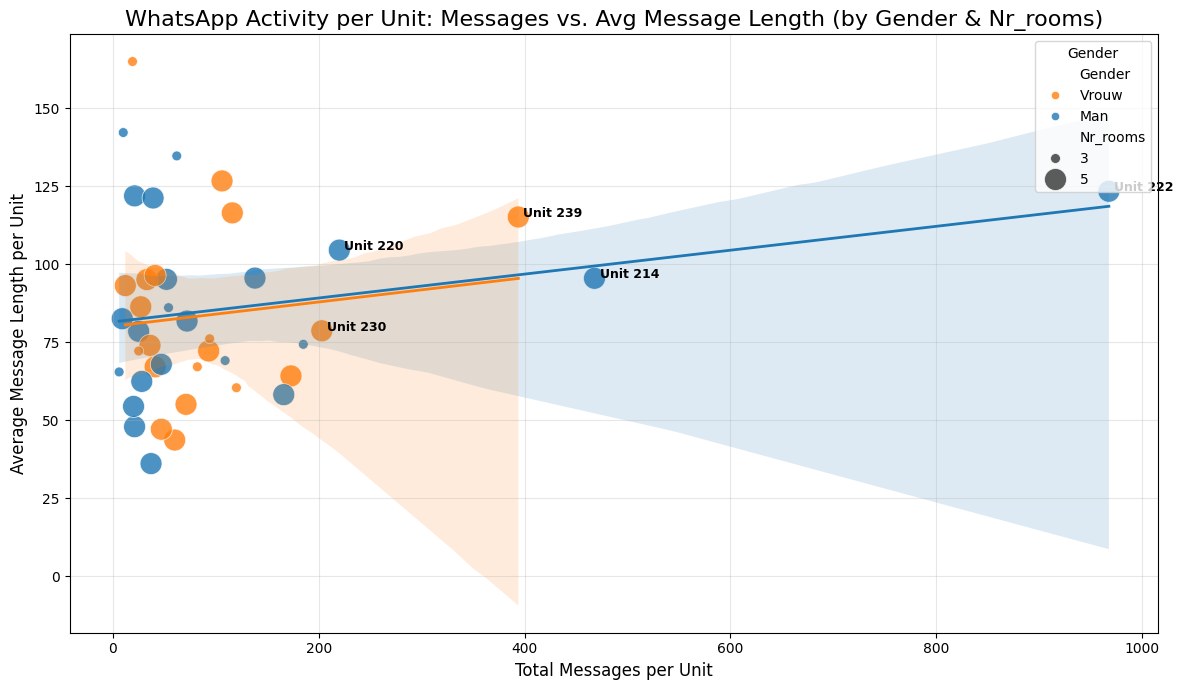

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# --- Load WhatsApp export dataframe 'df' ---
# df should already be loaded with columns including 'author', 'msg_length', 'message'

# --- Load metadata ---
with open("nested_users5.json", "r") as f:
    nested_users = json.load(f)

# Convert dictionary to DataFrame
author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# --- Merge WhatsApp data with user info ---
df_merged = df.merge(author_info_df, on='author', how='left')

# --- Aggregate per unit ---
unit_stats = (
    df_merged.groupby("Unit_nr")
             .agg(total_messages=("message", "count"),
                  avg_msg_length=("msg_length", "mean"),
                  Gender=("Gender", "first"),
                  Nr_rooms=("Nr_rooms", "first"))
             .reset_index()
)

# --- Set up the plot ---
plt.figure(figsize=(12, 7))
palette = {"Man": "#1f77b4", "Vrouw": "#ff7f0e"}  # optional custom colors

# Scatter plot with size representing Nr_rooms
sns.scatterplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Gender",
    size="Nr_rooms",
    sizes=(50, 250),
    alpha=0.8,
    edgecolor="white",
    palette=palette
)

# Add regression trend lines per Gender
sns.regplot(
    data=unit_stats[unit_stats['Gender'] == 'Man'],
    x="total_messages",
    y="avg_msg_length",
    scatter=False,
    color=palette['Man'],
    line_kws={"lw": 2}
)
sns.regplot(
    data=unit_stats[unit_stats['Gender'] == 'Vrouw'],
    x="total_messages",
    y="avg_msg_length",
    scatter=False,
    color=palette['Vrouw'],
    line_kws={"lw": 2}
)

# Annotate top active units
threshold = unit_stats['total_messages'].quantile(0.9)  # top 10% messages
for i, row in unit_stats.iterrows():
    if row['total_messages'] >= threshold:
        plt.text(
            row['total_messages'] + 5,  # small offset
            row['avg_msg_length'],
            f"Unit {row['Unit_nr']}",
            fontsize=9,
            weight='bold'
        )

# Customize plot
plt.title("WhatsApp Activity per Unit: Messages vs. Avg Message Length (by Gender & Nr_rooms)", fontsize=16)
plt.xlabel("Total Messages per Unit", fontsize=12)
plt.ylabel("Average Message Length per Unit", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Gender", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()


/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/MADS-DAV/.venv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


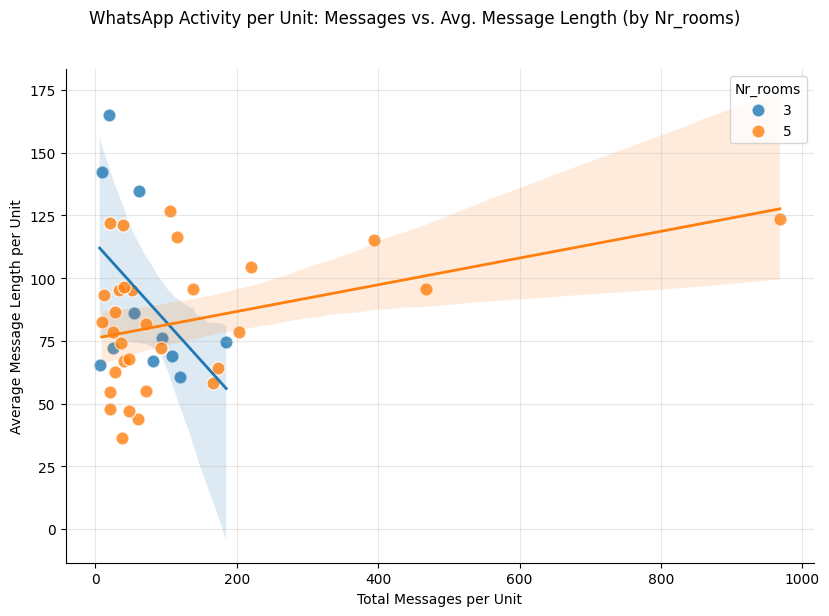

In [142]:
# --- Plot with only Nr_rooms as hue ---
g = sns.lmplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Nr_rooms",  # Highlight by number of rooms
    height=6,
    aspect=1.4,
    scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
    line_kws={"lw": 2},
    legend_out=False  # Keep legend inside the plot
)

# --- Customize labels ---
g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
g.fig.suptitle("WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Nr_rooms)", y=1.02)

# --- Move legend to top-right ---
g.ax.legend(loc="upper right", title="Nr_rooms")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


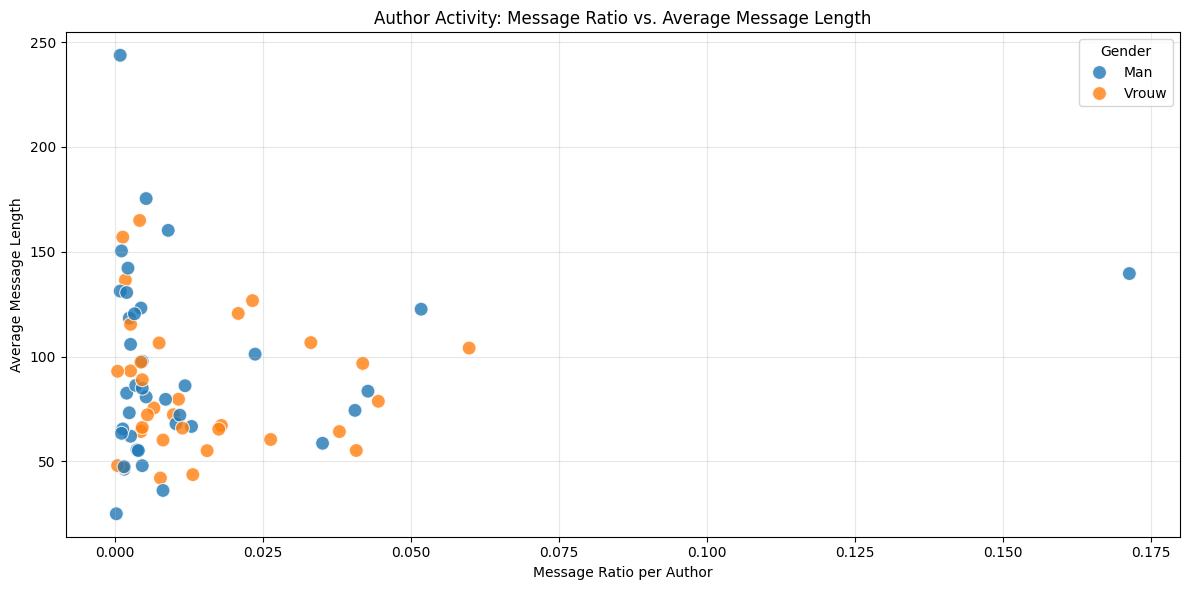

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Calculate total messages in the group ---
total_messages_group = df['message'].count()

# --- Aggregate per author ---
author_stats = (
    df.groupby("author")
      .agg(total_messages=("message", "count"),
           avg_msg_length=("msg_length", "mean"))
      .reset_index()
)

# --- Calculate message ratio per author ---
author_stats['msg_ratio'] = author_stats['total_messages'] / total_messages_group

# --- Merge with user info if you want additional metadata ---
author_stats = author_stats.merge(author_info_df, on='author', how='left')

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=author_stats,
    x='msg_ratio',
    y='avg_msg_length',
    hue='Gender',  # optional: color by Gender
    s=100,
    alpha=0.8,
    edgecolor='white'
)

plt.title("Author Activity: Message Ratio vs. Average Message Length")
plt.xlabel("Message Ratio per Author")
plt.ylabel("Average Message Length")
plt.grid(True, alpha=0.3)
plt.legend(title="Gender", loc='upper right')
plt.tight_layout()
plt.show()


/Users/luiginocleofa/1_HU_Post_HBO_AI/DAV/MADS-DAV/.venv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


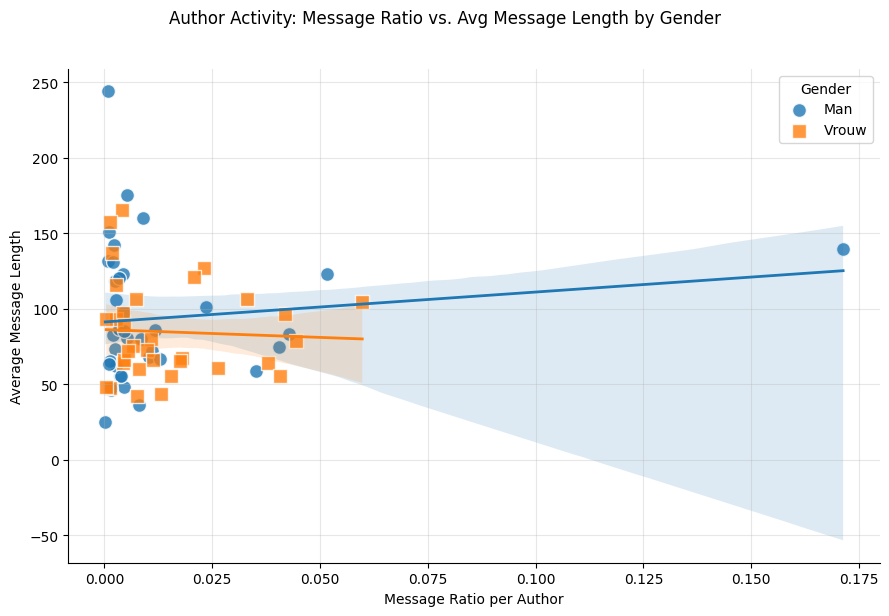

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Plot with regression lines per gender ---
g = sns.lmplot(
    data=author_stats,
    x='msg_ratio',
    y='avg_msg_length',
    hue='Gender',         # separate regression lines by Gender
    height=6,
    aspect=1.5,
    markers=['o', 's'],   # different marker for each gender
    scatter_kws={"s": 100, "alpha": 0.8, "edgecolor": "white"},
    line_kws={"lw": 2},   # line thickness
    legend_out=False       # keep legend inside the plot
)

# --- Customize labels ---
g.set_axis_labels("Message Ratio per Author", "Average Message Length")
g.fig.suptitle("Author Activity: Message Ratio vs. Avg Message Length by Gender", y=1.02)

# --- Move legend to top-right ---
g.ax.legend(loc='upper right', title="Gender")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


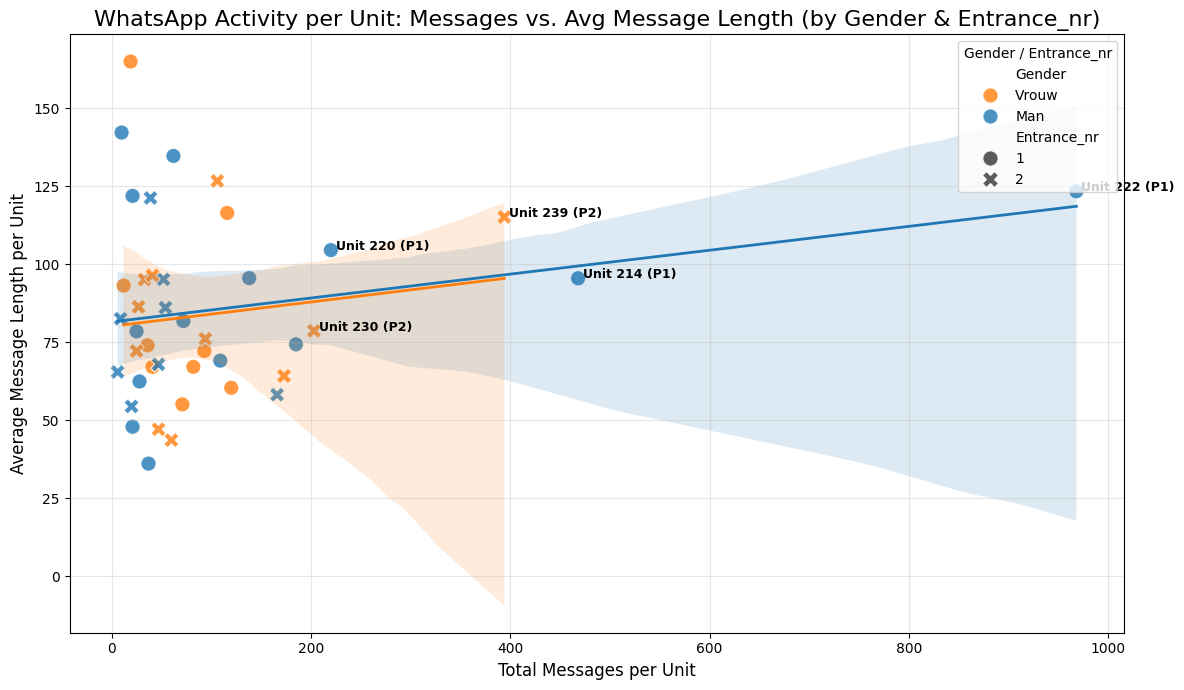

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# --- Load WhatsApp export dataframe 'df' ---
# df should already be loaded with columns including 'author', 'msg_length', 'message'

# --- Load metadata ---
with open("nested_users5.json", "r") as f:
    nested_users = json.load(f)

# Convert dictionary to DataFrame
author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# --- Merge WhatsApp data with user info ---
df_merged = df.merge(author_info_df, on='author', how='left')

# --- Aggregate per unit ---
unit_stats = (
    df_merged.groupby("Unit_nr")
             .agg(total_messages=("message", "count"),
                  avg_msg_length=("msg_length", "mean"),
                  Gender=("Gender", "first"),
                  Entrance_nr=("Entrance_nr", "first"))
             .reset_index()
)

# --- Set up the plot ---
plt.figure(figsize=(12, 7))
palette = {"Man": "#1f77b4", "Vrouw": "#ff7f0e"}  # optional custom colors

# Scatter plot with point size representing Entrance_nr groups
sns.scatterplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Gender",
    style="Entrance_nr",  # differentiate entrances by marker shape
    s=120,
    alpha=0.8,
    edgecolor="white",
    palette=palette
)

# Add regression trend lines per Gender
sns.regplot(
    data=unit_stats[unit_stats['Gender'] == 'Man'],
    x="total_messages",
    y="avg_msg_length",
    scatter=False,
    color=palette['Man'],
    line_kws={"lw": 2}
)
sns.regplot(
    data=unit_stats[unit_stats['Gender'] == 'Vrouw'],
    x="total_messages",
    y="avg_msg_length",
    scatter=False,
    color=palette['Vrouw'],
    line_kws={"lw": 2}
)

# Annotate top active units
threshold = unit_stats['total_messages'].quantile(0.9)  # top 10% messages
for i, row in unit_stats.iterrows():
    if row['total_messages'] >= threshold:
        plt.text(
            row['total_messages'] + 5,
            row['avg_msg_length'],
            f"Unit {row['Unit_nr']} (P{row['Entrance_nr']})",
            fontsize=9,
            weight='bold'
        )

# Customize plot
plt.title("WhatsApp Activity per Unit: Messages vs. Avg Message Length (by Gender & Entrance_nr)", fontsize=16)
plt.xlabel("Total Messages per Unit", fontsize=12)
plt.ylabel("Average Message Length per Unit", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Gender / Entrance_nr", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()


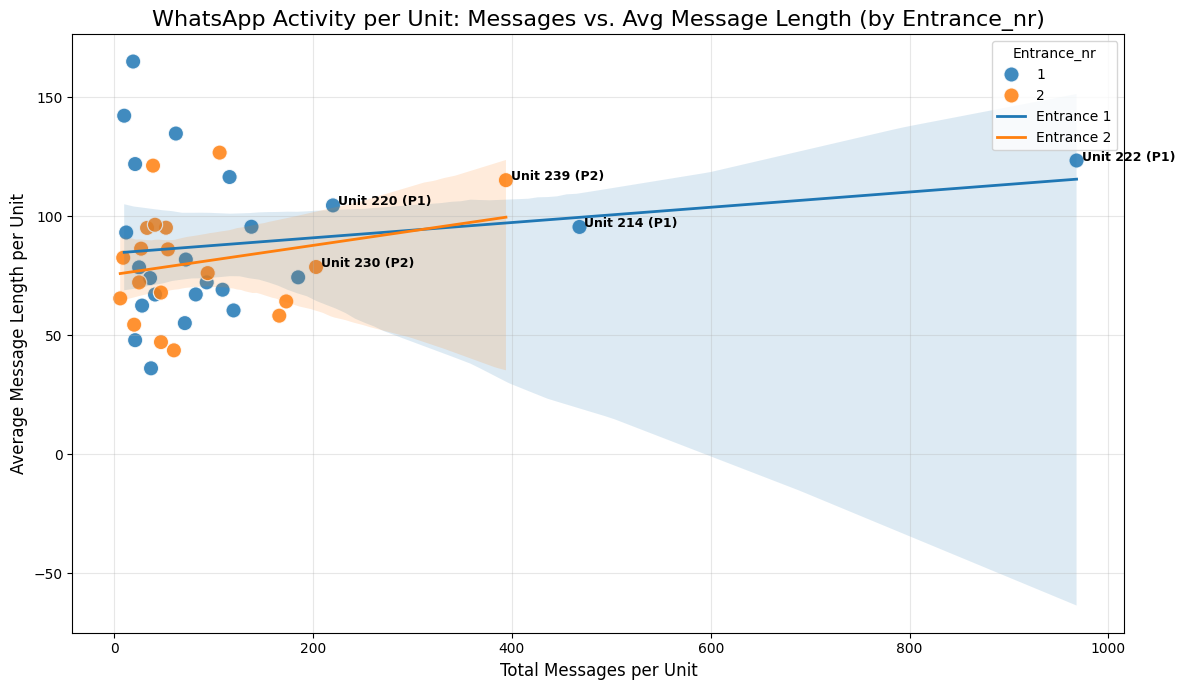

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# --- Load WhatsApp export dataframe 'df' ---
# df should already be loaded with columns including 'author', 'msg_length', 'message'

# --- Load metadata ---
with open("nested_users5.json", "r") as f:
    nested_users = json.load(f)

# Convert dictionary to DataFrame
author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# --- Merge WhatsApp data with user info ---
df_merged = df.merge(author_info_df, on='author', how='left')

# --- Aggregate per unit ---
unit_stats = (
    df_merged.groupby("Unit_nr")
             .agg(total_messages=("message", "count"),
                  avg_msg_length=("msg_length", "mean"),
                  Entrance_nr=("Entrance_nr", "first"))
             .reset_index()
)

# --- Set up the plot ---
plt.figure(figsize=(12, 7))

# Scatter plot: color by Entrance_nr
sns.scatterplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Entrance_nr",
    palette="tab10",   # distinct colors for entrances
    s=120,
    alpha=0.85,
    edgecolor="white"
)

# Add regression lines per Entrance_nr
for entrance in unit_stats['Entrance_nr'].unique():
    subset = unit_stats[unit_stats['Entrance_nr'] == entrance]
    sns.regplot(
        data=subset,
        x="total_messages",
        y="avg_msg_length",
        scatter=False,
        label=f"Entrance {entrance}",
        line_kws={"lw": 2}
    )

# Annotate top active units
threshold = unit_stats['total_messages'].quantile(0.9)  # top 10% messages
for i, row in unit_stats.iterrows():
    if row['total_messages'] >= threshold:
        plt.text(
            row['total_messages'] + 5,
            row['avg_msg_length'],
            f"Unit {row['Unit_nr']} (P{row['Entrance_nr']})",
            fontsize=9,
            weight='bold'
        )

# Customize plot
plt.title("WhatsApp Activity per Unit: Messages vs. Avg Message Length (by Entrance_nr)", fontsize=16)
plt.xlabel("Total Messages per Unit", fontsize=12)
plt.ylabel("Average Message Length per Unit", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Entrance_nr", loc="upper right", frameon=True)
plt.tight_layout()
plt.show()
